## ARBOL DE DECISIÓN 


Lo primero que vamos hacer es cargar las libreria pandas para leer nuetros archivo  que es de tipo csv

In [2]:
import pandas as pd # nos ayuda para el análisis de datos 


ahora lo que  vamos hacer es cargar los archivos en este caso en de calidad del vino 

In [8]:
# vamos a llamar a objeto data 
data = pd.read_csv("winequality-red.csv")
  
data.head()  #para visualizar los datos 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


En los datos podemos observar tenemos 12 columnas con informacion de 
1 - Acidez fija

2 - Acidez volátil

3 - Ácido cítrico

4 - Azúcar residual

5 - Cloruros

6 - Dióxido de azufre libre

7 - Dióxido de azufre total

8 - Densidad

9 - pH

10 - Sulfatos

11 - Alcohol

12 - Calidad


validamos que se haya cargado correctamente las variables 

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


observamos que nuestro dataset tiene 1599 registros y 12 columnas y que ninguna de nuestras variables presenta valores nulos quiere decir que esta balanceado
tenemos dos tipos de datos en la variable calidad numero entero sin decimales y para las demas si presenta decimanles

In [12]:
# vamos revisar la parte estadistica entender y reavisar nuestras variables
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


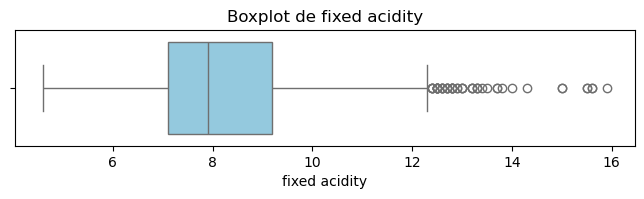

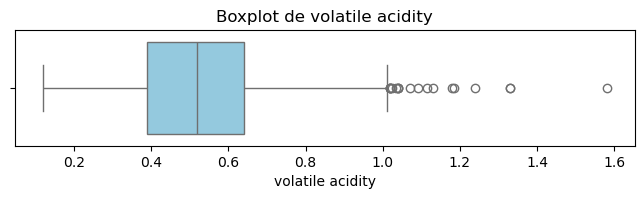

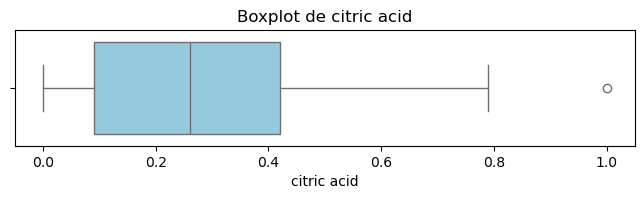

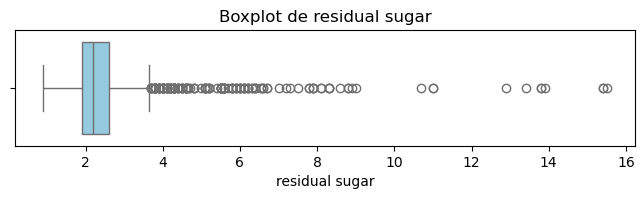

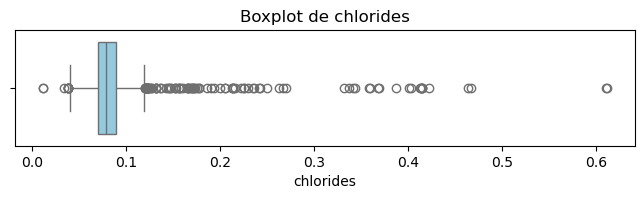

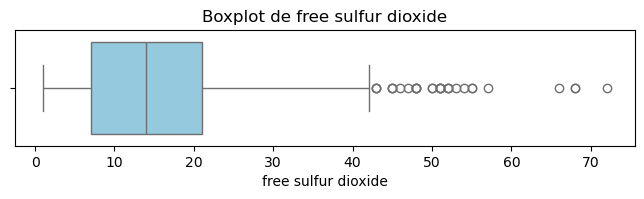

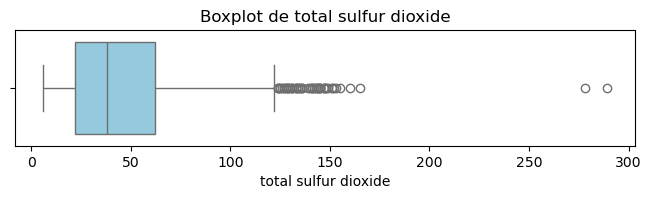

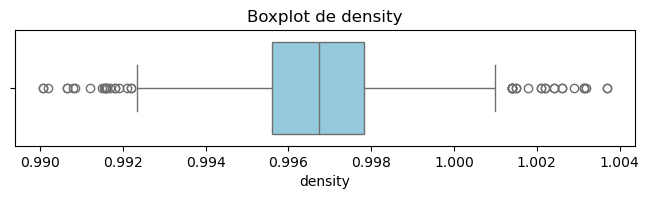

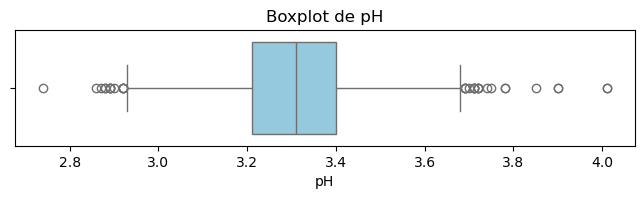

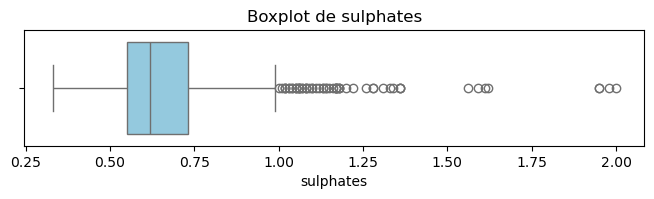

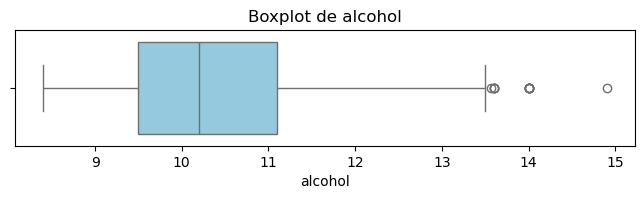

In [20]:
# vamos identificar si tenemos datos atipicos mediante la graficacion de boxplot 
# importamos la lobreria
import matplotlib.pyplot as plt
import seaborn as sns
plt.show()

# Boxplots para valores atípicos
for col in data.columns[:-1]:
    plt.figure(figsize=(8, 1.5))
    sns.boxplot(data=data, x=col, color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.show()

como se observa tenemos varios datos atipicos en las variables con mayor catidad de estos son las siguientes  en la acidez, azucar residual, cloruros, Dióxido de azufre total, densidad, sulfatos vamos a eliminar estos datos atipicos ya que esto no afectara nuestro modelo vamos a usar el  método IQR que es una forma estadística para detectar datos atípicos (outliers) en variables numéricas.

lo que hace es  los datos que están muy por debajo de Q1 o muy por encima de Q3, 
 se marca como atípico 

In [17]:

# Calcular Q1, Q3 y el rango intercuartílico (IQR)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Detectar filas que contienen al menos un outlier
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
data_outliers = data[outliers]

print(f"Número de filas con al menos un outlier: {data_outliers.shape[0]}")



Número de filas con al menos un outlier: 420


In [23]:
#eliminar datos 
data_sin_outliers = data[~outliers]
print(f"Filas después de eliminar outliers: {data_sin_outliers.shape[0]}")


Filas después de eliminar outliers: 1179


In [24]:
print("Resumen original:")
print(data.describe())

print("\nResumen sin outliers:")
print(data_sin_outliers.describe())


Resumen original:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000            

una vez ya los datos limpos de datos atipicos empezaremos trabajar seleccionando las caracteristicas mas relevantes


(array([ 33.,   0.,   0., 513.,   0.,   0., 498.,   0.,   0., 135.]),
 array([4. , 4.3, 4.6, 4.9, 5.2, 5.5, 5.8, 6.1, 6.4, 6.7, 7. ]),
 <BarContainer object of 10 artists>)

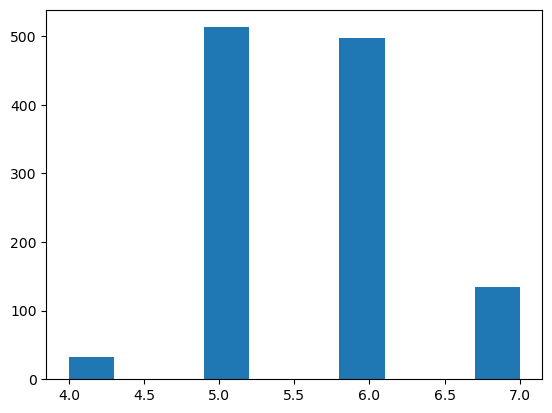

In [232]:
# analizar cuantos elementos hay de cada clase de calidad 
plt.hist(data_sin_outliers.quality)

In [29]:
data_sin_outliers.shape

(1179, 12)

con el histograma bucamos ver cuantos elemtos hay de cada nivel que es nuestra varialble objetivo vemos que en el (nivel 5) es nivel que mas registros presenta 513 seguido de el (nivel 6) 498 para un total de 1179 filas con registros y podemos analisas que estos dos niveles son los que mas datos nos van a proporcionar para que nuestro modelo fucione

mediante una matriz de correlacción vamos a determinar cuales son las caracterististicas mas relevantes para nuestro modelo de clasificación .

Text(0.5, 1.0, 'matriz de correlación')

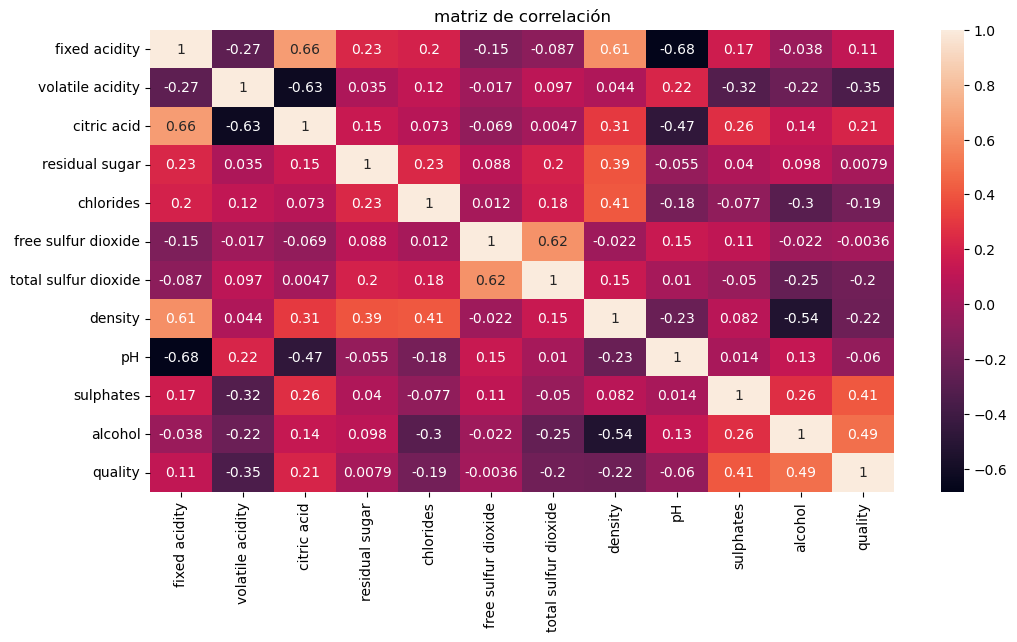

In [169]:

#  Análisis Exploratorio de Datos (EDA)

# Matriz de correlación
plt.figure(figsize=(12,6))
sns.heatmap(data_sin_outliers.corr(), annot = True)
plt.title("matriz de correlación")

como vemos hay una correlacion alta entre las variables del alcohol y los sulfatos respecto a la calidad esto quiere decir nuetra variable objetivo y la predcicion de la calidad del vino tiene que ver con la craatreristica de alchol y sulfatos esto lo veremos despues de realizar la modelacion y entrenamiento 

# dividir el modelo  y entrenarlo 

vamos a separar las variables predictorias (carateristicas) y la variable a predecir que es la objetivo  en este caso la calidad

In [170]:
#varibles predictorias 

X = data_sin_outliers.drop('quality', axis=1)
Y = data_sin_outliers['quality']
#variables a predecir 

#mostramos las 5 primeras filas 
X.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


lo que se hizo fue separar la variables como vemos en X ya no esta calidad ya que es la variable objetivo la que buscamos predecir y en Y tenemos la otras variables que son las caracteristicas que nos va ayudar a entrena el modelo para precedir los resultados

# vamos a dividir nuestros datos en las tablas testing y training 
que es dividir nuetro conjunto de datos en un 80% para entrenar nuestro modelo y el 20% para evaluar 


In [171]:
from sklearn.model_selection import train_test_split
#X_train y Y_train para entrenamineto 
#Y_test y Y_test para prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [172]:
# vamos a revisar la infomacion de la tabla de entrenamiento 
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 943 entries, 945 to 1179
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         943 non-null    float64
 1   volatile acidity      943 non-null    float64
 2   citric acid           943 non-null    float64
 3   residual sugar        943 non-null    float64
 4   chlorides             943 non-null    float64
 5   free sulfur dioxide   943 non-null    float64
 6   total sulfur dioxide  943 non-null    float64
 7   density               943 non-null    float64
 8   pH                    943 non-null    float64
 9   sulphates             943 non-null    float64
 10  alcohol               943 non-null    float64
dtypes: float64(11)
memory usage: 88.4 KB


esto nos dice que vamos a trabajar con 943 registros y 10 columnas 

In [173]:
Y_train.info()

<class 'pandas.core.series.Series'>
Index: 943 entries, 945 to 1179
Series name: quality
Non-Null Count  Dtype
--------------  -----
943 non-null    int64
dtypes: int64(1)
memory usage: 14.7 KB


# el modelo de clasificación que vamos a trabajar es el arbol de decision

In [222]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
#llamamos a contructo del arbol de decisión 

arbol = DecisionTreeClassifier(max_depth=8)
#entrenamos el modelo 
arbol_calidad= arbol.fit(X_train, Y_train)


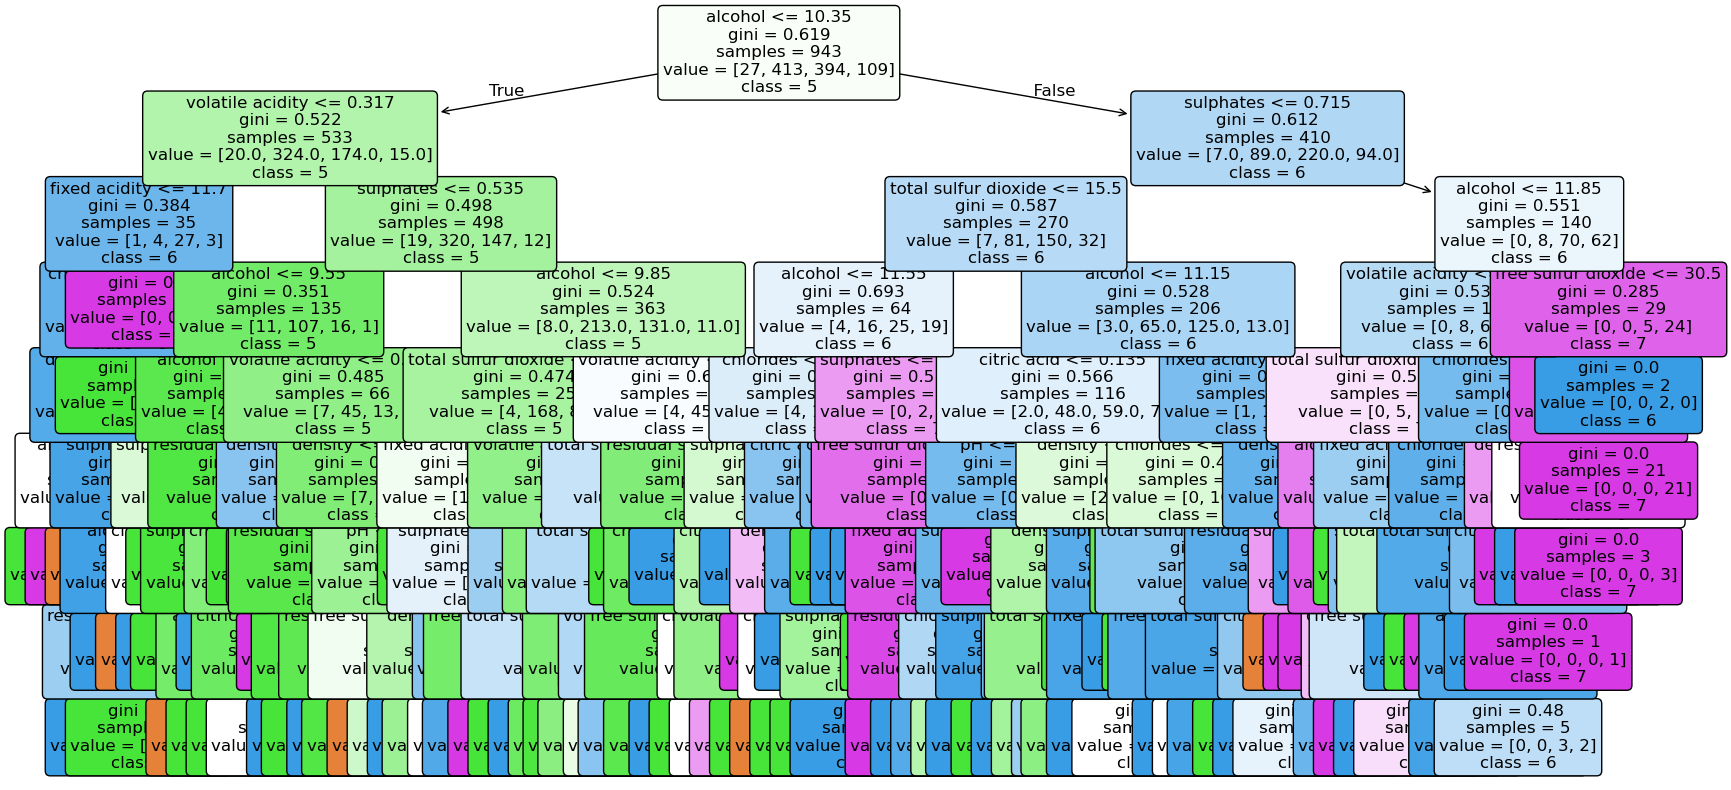

In [223]:
from sklearn import tree

fig=plt.figure(figsize=(20,10))  # Tamaño del gráfico
tree.plot_tree(arbol, 
          feature_names=X_train.columns,     # nombres de las columnas
          class_names=[str(c) for c in arbol.classes_],  # clases en formato string
          filled=True,                       # colorear nodos por clase
          rounded=True,                      # bordes redondeados
          fontsize=12)                       # tamaño de fuente
plt.show()

In [224]:
fig.savefig("Arbol yair.png") # guardo la imagen 

se dibuja el árbol de decisión entrenado (arbol)

nos da una representación gráfica del modelo: cómo toma decisiones, qué condiciones usa, y cómo divide los datos.

bueno observamos el modelo de 8 niveles donde se ve como el modelo clasifica en clases de calidad del vino segun los datos de las carateristicas como por ejemplo el valor de los sufatos los datos verdaderos son las flechas izquierdas y del lado derecho los datos de valor falso 

In [225]:
# vamos a observa las predicciones hechas por el modelo 
predicciones= arbol_calidad.predict(X_test)

In [226]:
predicciones

array([6, 5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5,
       5, 5, 6, 6, 6, 6, 6, 4, 6, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6,
       5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 6,
       5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 6, 7, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5,
       6, 6, 5, 7, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5,
       6, 6, 5, 5, 5, 5, 5, 7, 5, 6, 5, 6, 6, 6, 5, 5, 5, 4, 6, 6, 6, 5,
       5, 5, 5, 6, 6, 7, 6, 5, 5, 5, 5, 6, 5, 6, 5, 7, 5, 7, 5, 6, 5, 6,
       5, 7, 6, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5,
       5, 7, 6, 5, 6, 6, 6, 6, 6, 5, 7, 6, 5, 5, 6, 6, 7, 7, 5, 6, 6, 5,
       7, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 7, 7, 6, 6, 5, 6, 6, 5,
       7, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6], dtype=int64)

# vamos a calcular la precisión del modelo 
creamos la matriz de confusión con el fin de analizar el desempeño


In [233]:
# vamos examinar la matriz de conficion donde vamos a visualizar el desempeño del aprendizaje supervidado
import numpy as np
import pandas as pd

# Asegúramos de que Y_test y predicciones sean arrays unidimensionales
Y_test_flat = np.array(Y_test)  # Ya es una Serie, por lo que solo convertimos a un array
predicciones = np.array(predicciones)  # Asegúrate de que predicciones también sea un array unidimensional

# Ahora crea la matriz de confusión
pd.crosstab(Y_test_flat, predicciones, rownames=["Actual"], colnames=["Predicción"])



Predicción,4,5,6,7
Actual,,,,
4,2,3,1,0
5,0,81,19,0
6,0,39,56,9
7,0,4,12,10


en la matriz observamos que en la prediccion de clase 5 calidad del vino no se pedijo correctamente podemos vusualizar que el modelo esta presentando dificultades paar precedir con el nivel 5 

In [238]:
# vamos a ver  que dicen la las metricas  del modelo

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(Y_test, predicciones)
accuracy


0.6313559322033898

In [239]:
precision = precision_score(Y_test, predicciones, average= "weighted")
precision

0.634091340115208

In [240]:
recall = recall_score(Y_test, predicciones, average= "weighted")
recall

0.6313559322033898

In [241]:
f1 = f1_score(Y_test, predicciones, average= "weighted")
f1

0.6211350041895849

# analisis e interpretación de resiltados  
podemos ver que las métricas de desempeño: precisión, recall, f1-score  para cada clase
obtuvimos los siguintes resultados 
 

Precisión (precision): Es la proporción de predicciones correctas para una clase, es decir, de todas las veces que el modelo predijo una clase en particular, cuántas veces realmente fue correcta. en nuetro modelo fue 0.62 0 62% 
Recall (recuperación o sensibilidad): Mide la capacidad del modelo para encontrar todas las instancias de una clase. Es la proporción de verdaderos positivos entre todas las instancias que realmente pertenecen a la clase fue de 63%
 
F1-Score: Es la media armónica entre precisión y recall, lo que lo convierte en una métrica útil cuando hay un desbalance entre las clases. Es una combinación de ambas, y fue del 62%

Accuracy (Precisión global): 0.63, esto indica que el modelo tiene un 63% de precisión general sobre todas las clases.

Ahora vamos a analizar los resultados del modelo 

el modelo fuciono bien con las calse 5, 6  y en el 7 fue malo en las demas clases no fucniona debido a poco numero de registro que se encontraba en dat set lo que genero pocos criterio a la hora de predecir.

a pesar del ajuste de hiperparametros como ajustar la cantidad maxima de niveles del arbol no fueron suficientes paar mejorar el modelo ya que con un maximo de 20 niveles el eccuracy bajo a 53% se dejo en 8 ya que arrojo un mejor resultado de prediccion


Conclusión:
El modelo tiene un buen desempeño en la clase 5, pero le está costando predecir adecuadamente las clases 4 y 7. La clase 4 parece ser un desafío importante, ya que su precisión y recall son nulos. En general, el modelo parece tener un desempeño razonable, pero podría mejorarse, especialmente para las clases con poco soporte o desbalanceadas.

In [ ]:
# 